# Task 4

Exploring meteorological data for three airports in New York: LGA, JFK, and EWR for the whole year of 2013
- Applying data wrangling techniques to explore the data

` Import all required libraries for Completing the task `
Here I need 4 basic libraries of python to complete this task . One of these is numpy which is a basic python libraries to deal with metrices and numerical calculations. Second one is pandas which is a python basic library to deal with datasets, like dataframes, and series. Matplotlib is also required to plot required plotting in this task. Matplotlib is a visualization library present in python. Finally, I have added datetime library to handle date time task of this notebook.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

### Loading data
- Reading csv data in a pandas dataframe using `pd.read_csv` method
- Looking at head of data using `dataframe.head()` method

Pandas is the library which I am using here to load a csv dataset. CSV is a comma delimeted format of data which is often used to store data in real world. To see first few rows of data pandas provides a method which can be used to see data present in first few rows of data, we can also specify number of rows in dataframe.head() method as argument, we can also use dataframe.tail() to visualize the last few rows of data. 

In [2]:
data = pd.read_csv("/kaggle/input/atmosphere-data/weather.csv")
data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,1/1/2013 1:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,1/1/2013 2:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,1/1/2013 3:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,1/1/2013 4:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,1/1/2013 5:00


This data can be visualized from above table. We can see that total of 15 columns we have got which are known as attributes. This represents metrological values in 3 of airports with timing details, e.g. month, year, date and time. As this is read using dataframe so dataframe adds an index column in the starting that you can see starting from 0. 

### Units Conversion
- Converting unit measurement of all columns 
    - Faherenheit to celcius `C = (F-32) * (5/9)`
    - Inches to millimeters  `1 inch = 25.4 mm`
    - Miles to kilometers  `1 mile = 1.609 kilometers`
    - millibars to pascal `1 millibar = 1000 pascal`

In [3]:
data["temp"]= ((data['temp'] - 32) * (5/9))
data["dewp"]= ((data['dewp'] - 32) * (5/9))
data["precip"]= data['precip']*25.4
data["visib"]= data['visib']*1.60934
data["wind_speed"] = data["wind_speed"]*1.60934
data["wind_gust"] = data["wind_gust"]*1.60934
data["pressure"] = data["pressure"]*1000
data

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013900.0,16.0934,1/1/2013 1:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013000.0,16.0934,1/1/2013 2:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.371959,23.443643,0.0,1012600.0,16.0934,1/1/2013 3:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.223955,25.574883,0.0,1012700.0,16.0934,1/1/2013 4:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.075952,27.706124,0.0,1012800.0,16.0934,1/1/2013 5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,2.2,-6.7,51.78,340.0,22.223955,25.574883,0.0,1017100.0,16.0934,12/30/2013 20:00
26126,LGA,2013,12,30,20,1.1,-8.3,49.51,330.0,27.779944,31.968604,0.0,1018800.0,16.0934,12/30/2013 21:00
26127,LGA,2013,12,30,21,0.0,-9.4,49.19,340.0,24.075952,27.706124,0.0,1019500.0,16.0934,12/30/2013 22:00
26128,LGA,2013,12,30,22,-0.6,-10.6,46.74,320.0,27.779944,31.968604,0.0,1019900.0,16.0934,12/30/2013 23:00


After applying thse mathametical formulas now we can vislualize our data in above table that all the units are converted in standard SI units. Temperature now is in celcius, while pressure in pascal, wind_speed in km/h and precip in km. Rest of all data is exactly same with changing in few column units.

### Time Format
- converting time format of <b>time_hour</b> to daytime64
- Subtracting <b>1 hour</b> to make compatible with date and time 
Here in this task I am converting the format of time, in which I will be using `pandas.to_datetime()` method to convert time in a datetime format, with that I will have time in the format of `mm-dd-yy HH:MM`. Next to subtract 1 hour of time from data to make it in balance with data and time, I am subtracting 1 using `timedelta()` in which I am providing 1 as argument to make difference of 1 hour. After completion of all these changins data will again be printed.

In [4]:

data['time_hour']= pd.to_datetime(data['time_hour'], format='%m/%d/%Y %H:%M')
data['time_hour']= data['time_hour'] - timedelta(hours=1)
data

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013900.0,16.0934,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013000.0,16.0934,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.371959,23.443643,0.0,1012600.0,16.0934,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.223955,25.574883,0.0,1012700.0,16.0934,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.075952,27.706124,0.0,1012800.0,16.0934,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,2.2,-6.7,51.78,340.0,22.223955,25.574883,0.0,1017100.0,16.0934,2013-12-30 19:00:00
26126,LGA,2013,12,30,20,1.1,-8.3,49.51,330.0,27.779944,31.968604,0.0,1018800.0,16.0934,2013-12-30 20:00:00
26127,LGA,2013,12,30,21,0.0,-9.4,49.19,340.0,24.075952,27.706124,0.0,1019500.0,16.0934,2013-12-30 21:00:00
26128,LGA,2013,12,30,22,-0.6,-10.6,46.74,320.0,27.779944,31.968604,0.0,1019900.0,16.0934,2013-12-30 22:00:00


Here now we can see that date and time format is changed as we wanted. Now date and time can be seen as yy-mm-dd hh:mm. Moreover 1 hours is also subtracted from time. 

### JFK Airport 
- Selecting only rows for <b>JFK</b> Airport 
- Finding average temperature per day for whole year
- Groupingby data with month and day to get average temperature per day
To find out data havin airport JFk I am giving a argument in `data.loc[]` instance of dataframe a column of dataframe with a condition that all the valued of that column meets given requirement which is `origin=='JFK'` by using this I will have data only from JFK airport. 

In [5]:
data_JFK = data.loc[data['origin'] == 'JFK']
data_JFK

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
8708,JFK,2013,1,1,0,3.3,-5.0,54.51,240.0,25.927948,29.837364,0.0,1014400.0,16.0934,2013-01-01 00:00:00
8709,JFK,2013,1,1,1,3.3,-4.4,57.04,250.0,27.779944,31.968604,0.0,1013500.0,16.0934,2013-01-01 01:00:00
8710,JFK,2013,1,1,2,3.9,-3.9,56.77,240.0,31.483937,36.231085,0.0,1013000.0,16.0934,2013-01-01 02:00:00
8711,JFK,2013,1,1,3,3.9,-3.3,59.37,240.0,29.631941,34.099845,0.0,1013200.0,16.0934,2013-01-01 03:00:00
8712,JFK,2013,1,1,4,3.9,-3.9,56.77,260.0,24.075952,27.706124,0.0,1013200.0,16.0934,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17414,JFK,2013,12,30,19,3.3,-6.1,50.14,330.0,25.927948,29.837364,0.0,1017400.0,16.0934,2013-12-30 19:00:00
17415,JFK,2013,12,30,20,2.2,-7.8,47.57,340.0,27.779944,31.968604,0.0,1018700.0,16.0934,2013-12-30 20:00:00
17416,JFK,2013,12,30,21,1.1,-8.9,47.25,330.0,31.483937,36.231085,0.0,1019500.0,16.0934,2013-12-30 21:00:00
17417,JFK,2013,12,30,22,0.0,-10.6,44.74,320.0,22.223955,25.574883,0.0,1020100.0,16.0934,2013-12-30 22:00:00


From the above table, it's clear that changes are implemented and as the length of table is being decreased, and all the rows contain JFK in region column of data. Hence we got only data of JFK airport.

###### Average Temperature
To find out average temperature of each day I am using `dataframe.groupby()` method of pandas which groups data with given column of set of columns, here I need to group data with month and day, so I will give an list of two columns as a groupby argument. Now to find out average I am giving name of column for which averge is needed that is temperature, and at the end I am reseting inex to get pure average values with no index.

In [6]:
average_temp = data_JFK.groupby(['month','day'],as_index='False')['temp'].mean().reset_index()
average_temp

,month,day,temp
0,1,1,3.817391
1,1,2,-1.920833
2,1,3,-1.237500
3,1,4,1.129167
4,1,5,2.720833
...,...,...,...
359,12,26,0.383333
360,12,27,2.220833
361,12,28,4.966667
362,12,29,6.533333


Above table represents the avergae temperature with respect to each day of each month. 

### Plot Average
- Plotting average temperature of every day using single plot
- Naming x-axis with name of months to make human readable
To plot these values I am making a figure with `plt.subplots()` which will be used to make a plot, now further to put x-axis I have made a list of names of months which I am giving as an argument to `ax.set_xticklabels()` this method changes x-axis label with given list of numbers of names.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


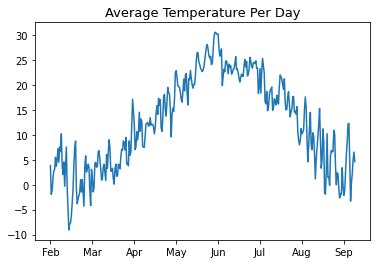

In [7]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots()
ax.plot(average_temp['temp'])
ax.set_xticklabels(months)
plt.title("Average Temperature Per Day", fontsize=13)
plt.show()

Here is a plot which represents average temperature throug out the year at JFK airport. We can see the heighest temperature was recorded in the month of June. At the x-asix we find names of months and at y-axis is the corresponding temperature of month. 

### 5 Hottest Days 
- Finding 5 hottest days of year at JFK Airport New York
Five hottest days can be found using `.nlargest()` method of dataframe in which I have given 5 as argument which is the number of heighest elements. So, here we are getting 5 hottest days in whole years.

In [8]:
average_temp['temp'].nlargest(5)

197    30.579167
196    30.483333
200    30.245833
198    30.241667
199    30.187500
Name: temp, dtype: float64

Above, are the highest temperatures and days of year correspoding to that temperature. 